# S&P Stock Prices 

## Purposes of this Notebook:

#### Cleaning and Exporting:
1. Clean API data
2. Export API data to JSON files to be later uploaded to MongoDB
3. Clean CSV data
4. Export CSV data to CSVs to be later uploaded to Azure SQL Server

#### Integrating Static and Real-time
1. Ingest real time data into the fact table over three time periods

#### Visualization
1. Create a plot that demonstrates the value of this solution

## Cleaning and Exporting

### 1. Cleaning API Data

#### Importing Data

In [1]:
import requests
import json


url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MMM&interval=5min&apikey=U7RNZJ8DMEW7Z53N'
r = requests.get(url)
data = r.json()

MMM = json.dumps(data)

print(MMM)

{"Meta Data": {"1. Information": "Intraday (5min) open, high, low, close prices and volume", "2. Symbol": "MMM", "3. Last Refreshed": "2022-05-11 18:10:00", "4. Interval": "5min", "5. Output Size": "Compact", "6. Time Zone": "US/Eastern"}, "Time Series (5min)": {"2022-05-11 18:10:00": {"1. open": "146.5000", "2. high": "146.5000", "3. low": "146.5000", "4. close": "146.5000", "5. volume": "300"}, "2022-05-11 17:40:00": {"1. open": "146.5000", "2. high": "146.5000", "3. low": "146.5000", "4. close": "146.5000", "5. volume": "110"}, "2022-05-11 16:25:00": {"1. open": "146.4100", "2. high": "146.4100", "3. low": "146.4100", "4. close": "146.4100", "5. volume": "1367"}, "2022-05-11 16:20:00": {"1. open": "146.4100", "2. high": "146.4100", "3. low": "146.4100", "4. close": "146.4100", "5. volume": "3349"}, "2022-05-11 16:10:00": {"1. open": "146.4100", "2. high": "146.4100", "3. low": "146.4100", "4. close": "146.4100", "5. volume": "108"}, "2022-05-11 16:05:00": {"1. open": "146.4100", "2.

In [133]:
#Second Company: AOS - A.O. Smith Corp

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=AOS&interval=5min&apikey=U7RNZJ8DMEW7Z53N'

r = requests.get(url)

data = r.json()

 

AOS = json.dumps(data)

In [3]:
#Third Company: ABT - Abbot Laboratories

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=ABT&interval=5min&apikey=U7RNZJ8DMEW7Z53N'
r = requests.get(url)
data = r.json()

ABT = json.dumps(data)

In [4]:
#Fourth Company: ABBV - AbbVie Inc.

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=ABBV&interval=5min&apikey=U7RNZJ8DMEW7Z53N'

r = requests.get(url)

data = r.json()

 

ABBV = json.dumps(data)

In [5]:
#Fifth Company: ACN - Accenture plc


url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=ACN&interval=5min&apikey=U7RNZJ8DMEW7Z53N'

r = requests.get(url)

data = r.json()

 

ACN = json.dumps(data)

#### Cleaning

In [9]:
import pandas as pd

MMMdf = pd.read_json(MMM)[["Time Series (5min)"]]



MMMdf.drop(index=MMMdf.index[:6], 
        axis=0, 
        inplace=True)

values = []

for i in range(len(MMMdf.index)):
    values.append(MMMdf["Time Series (5min)"][i]["1. open"])
    

MMMdf["Price"] = values

MMMdf = MMMdf.drop(["Time Series (5min)"], axis=1)

MMMdf

,Price
2022-05-11 18:10:00,146.5000
2022-05-11 17:40:00,146.5000
2022-05-11 16:25:00,146.4100
2022-05-11 16:20:00,146.4100
2022-05-11 16:10:00,146.4100
...,...
2022-05-10 16:05:00,149.1200
2022-05-10 16:00:00,149.1900
2022-05-10 15:55:00,149.0000
2022-05-10 15:50:00,148.6500


In [10]:
AOSdf = pd.read_json(AOS)[["Time Series (5min)"]]



AOSdf.drop(index=AOSdf.index[:6], 
        axis=0, 
        inplace=True)

values = []

for i in range(len(AOSdf.index)):
    values.append(AOSdf["Time Series (5min)"][i]["1. open"])
    

AOSdf["Price"] = values

AOSdf = AOSdf.drop(["Time Series (5min)"], axis=1)

In [11]:
ABTdf = pd.read_json(ABT)[["Time Series (5min)"]]



ABTdf.drop(index=ABTdf.index[:6], 
        axis=0, 
        inplace=True)

values = []

for i in range(len(ABTdf.index)):
    values.append(ABTdf["Time Series (5min)"][i]["1. open"])
    

ABTdf["Price"] = values

ABTdf = ABTdf.drop(["Time Series (5min)"], axis=1)

In [12]:
ABBVdf = pd.read_json(ABBV)[["Time Series (5min)"]]



ABBVdf.drop(index=ABBVdf.index[:6], 
        axis=0, 
        inplace=True)

values = []

for i in range(len(ABBVdf.index)):
    values.append(ABBVdf["Time Series (5min)"][i]["1. open"])
    

ABBVdf["Price"] = values

ABBVdf = ABBVdf.drop(["Time Series (5min)"], axis=1)

In [13]:
ACNdf = pd.read_json(ACN)[["Time Series (5min)"]]



ACNdf.drop(index=ACNdf.index[:6], 
        axis=0, 
        inplace=True)

values = []

for i in range(len(ACNdf.index)):
    values.append(ACNdf["Time Series (5min)"][i]["1. open"])
    

ACNdf["Price"] = values

ACNdf = ACNdf.drop(["Time Series (5min)"], axis=1)

### 2. Writing API Data to JSON Files

In [14]:
MMMjson = MMMdf.to_json(path_or_buf="/Users/charleslane/Desktop/DSS_FINAL/MMM.json")

### 3. Cleaning CSV Data

#### Importing CSV Data

In [15]:
import pandas as pd

financials = pd.read_csv("/Users/charleslane/Desktop/DSS_FINAL/financials.csv")

In [16]:
financials

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


#### Making 3 Dimension Tables

In [17]:
sectors = financials[["Symbol","Name","Sector"]]

In [18]:
historical = financials[["Symbol","Name","52 Week High","52 Week Low"]]

In [19]:
prices = financials[["Symbol","Name","Price","Market Cap"]]

### 4. Writing Cleaned CSV Data to CSVs

In [20]:
sectors.to_csv(path_or_buf="/Users/charleslane/Desktop/DSS_FINAL/sectors.csv")

In [22]:
historical.to_csv(path_or_buf="/Users/charleslane/Desktop/DSS_FINAL/historic.csv")

In [23]:
prices.to_csv(path_or_buf="/Users/charleslane/Desktop/DSS_FINAL/prices.csv")

## Integrating Static and Real-time Data

In this section I structure the static stock data fact table with a new time column. I then create a function that can update this table based off a company symbol and a specific time. This updated data comes from the streaming API mentioned above.

In [112]:
## Adding in a new time column

import numpy as np

static_data = financials[0:5]

time_list = ['2022-05-11 14:33:00', '2022-05-11 14:32:00', '2022-05-11 14:32:00', '2022-05-11 14:32:00', '2022-05-11 14:32:00']

static_data.insert(4, "Time", time_list, True)

static_data
            
            

,Symbol,Name,Sector,Price,Time,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,2022-05-11 14:33:00,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,2022-05-11 14:32:00,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,2022-05-11 14:32:00,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,2022-05-11 14:32:00,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,2022-05-11 14:32:00,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [132]:
## Creating a function to update the fact table with different stock prices for different times

def update_table(company, time):
    """ Function populating the financials fact table with new stock information for a prescribed company """
    global static_data
    url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol='+company+'&interval=5min&apikey=U7RNZJ8DMEW7Z53N'
    r = requests.get(url)
    data = r.json()

    stock = json.dumps(data)

    stockdf = pd.read_json(stock)[["Time Series (5min)"]]



    stockdf.drop(index=stockdf.index[:6], 
        axis=0, 
        inplace=True)

    values = []

    for i in range(len(stockdf.index)):
        values.append(stockdf["Time Series (5min)"][i]["1. open"])
    

    stockdf["Price"] = values

    stockdf = stockdf.drop(["Time Series (5min)"], axis=1)
    
    new_price = float(getattr(stockdf.loc[time], "Price"))
    
    static_data = static_data.replace(static_data[static_data["Symbol"] == company]["Price"][0], new_price)
    
    static_data = static_data.replace(static_data[static_data["Symbol"] == company]["Time"][0], time)
    
    return static_data



update_table('MMM','2022-05-11 14:30:00')


,Symbol,Name,Sector,Price,Time,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,147.40,2022-05-11 14:30:00,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,2022-05-11 14:32:00,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,2022-05-11 14:32:00,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,2022-05-11 14:32:00,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,2022-05-11 14:32:00,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [117]:
update_table('MMM', "2022-05-11 14:35:00")

,Symbol,Name,Sector,Price,Time,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,147.14,2022-05-11 14:35:00,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,2022-05-11 14:32:00,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,2022-05-11 14:32:00,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,2022-05-11 14:32:00,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,2022-05-11 14:32:00,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [118]:
update_table('MMM',"2022-05-11 14:40:00")

,Symbol,Name,Sector,Price,Time,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,147.48,2022-05-11 14:40:00,24.31,2.332862,7.92,259.77,175.490,1.387210e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,2022-05-11 14:32:00,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,2022-05-11 14:32:00,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,2022-05-11 14:32:00,19.41,2.499560,3.29,125.86,60.050,1.813860e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,2022-05-11 14:32:00,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Data Visualization

In this section I visualize the stock prices of various stocks as well as the market cap of these stocks.

<AxesSubplot:xlabel='Symbol'>

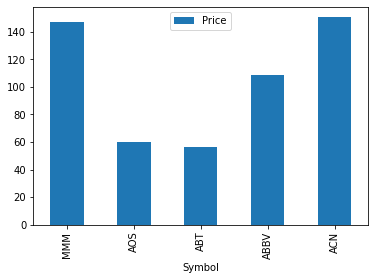

In [125]:
static_data.plot.bar(x = 'Symbol', y = 'Price')

<AxesSubplot:xlabel='Symbol'>

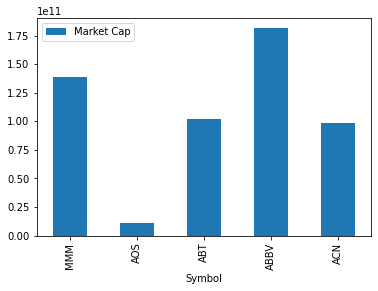

In [129]:
static_data.plot.bar(x = 'Symbol', y = 'Market Cap')